# 🛍️ Energy Prediction 
Author: [Ahmed Ali]
Date: [30/10/2025]

In [1]:
# 1️⃣ Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display options
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid', palette='coolwarm')

In [2]:
# 2️⃣ Load data
df = pd.read_csv('../data/energydata_complete.csv')

In [3]:
# 3️⃣ Basic info
print("Shape:", df.shape)
print("\nColumns:")
print(df.columns)
df.head()

Shape: (19735, 29)

Columns:
Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')


,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [4]:
# ===============================
# 🔍 Data Understanding
# ===============================

# Info about data types and missing values
df.info()

# Check for missing values
print("\nMissing values per column:\n", df.isnull().sum())

# Quick stats overview
df.describe().T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

,count,mean,std,min,25%,50%,75%,max
Appliances,19735.0,97.694958,102.524891,10.000000,50.000000,60.000000,100.000000,1080.000000
lights,19735.0,3.801875,7.935988,0.000000,0.000000,0.000000,0.000000,70.000000
T1,19735.0,21.686571,1.606066,16.790000,20.760000,21.600000,22.600000,26.260000
RH_1,19735.0,40.259739,3.979299,27.023333,37.333333,39.656667,43.066667,63.360000
T2,19735.0,20.341219,2.192974,16.100000,18.790000,20.000000,21.500000,29.856667
RH_2,19735.0,40.420420,4.069813,20.463333,37.900000,40.500000,43.260000,56.026667
T3,19735.0,22.267611,2.006111,17.200000,20.790000,22.100000,23.290000,29.236000
RH_3,19735.0,39.242500,3.254576,28.766667,36.900000,38.530000,41.760000,50.163333
T4,19735.0,20.855335,2.042884,15.100000,19.530000,20.666667,22.100000,26.200000
RH_4,19735.0,39.026904,4.341321,27.660000,35.530000,38.400000,42.156667,51.090000


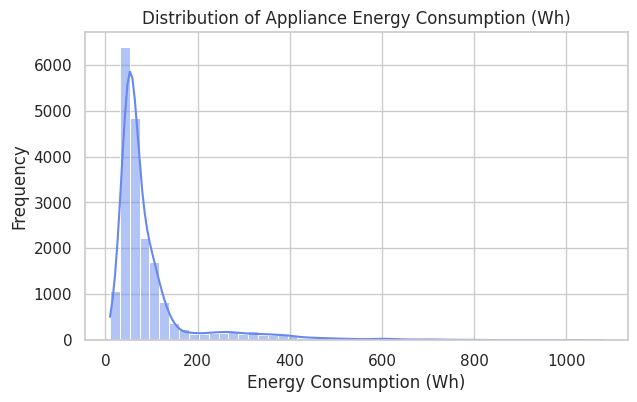

In [5]:
# Target Distribution

plt.figure(figsize=(7,4))
sns.histplot(df['Appliances'], bins=50, kde=True)
plt.title('Distribution of Appliance Energy Consumption (Wh)')
plt.xlabel('Energy Consumption (Wh)')
plt.ylabel('Frequency')
plt.show()

In [6]:
# ===============================
# 🕒 Feature Engineering: Datetime (Advanced Cyclic Encoding)
# ===============================

df['date'] = pd.to_datetime(df['date'])

df['hour'] = df['date'].dt.hour
df['minute'] = df['date'].dt.minute
df['day_of_week'] = df['date'].dt.dayofweek
df['month'] = df['date'].dt.month

# Cyclical encoding for time
df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)
df['minute_sin'] = np.sin(2 * np.pi * df['minute'] / 60)
df['minute_cos'] = np.cos(2 * np.pi * df['minute'] / 60)

# Drop redundant columns
df = df.drop(columns=['date', 'hour', 'minute'])

df.head()


,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,day_of_week,month,hour_sin,hour_cos,minute_sin,minute_cos
0,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,0,1,-0.965926,-0.258819,0.000000e+00,1.0
1,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,0,1,-0.965926,-0.258819,8.660254e-01,0.5
2,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,0,1,-0.965926,-0.258819,8.660254e-01,-0.5
3,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389,0,1,-0.965926,-0.258819,5.665539e-16,-1.0
4,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,0,1,-0.965926,-0.258819,-8.660254e-01,-0.5


In [7]:
# ===============================
# 🔍 Feature Correlation Analysis
# ===============================

# Compute correlation matrix (numerical only)
corr = df.corr(numeric_only=True)

# Focus on correlation with the target variable "Appliances"
target_corr = corr['Appliances'].sort_values(ascending=False)

# Display top correlated features
print("Top correlated features with Appliances:\n")
print(target_corr.head(15))


Top correlated features with Appliances:

Appliances    1.000000
lights        0.197278
T2            0.120073
T6            0.117638
T_out         0.099155
Windspeed     0.087122
RH_1          0.086031
T3            0.085060
T1            0.055447
T4            0.040281
T8            0.039572
RH_3          0.036292
T7            0.025801
T5            0.019760
RH_4          0.016965
Name: Appliances, dtype: float64


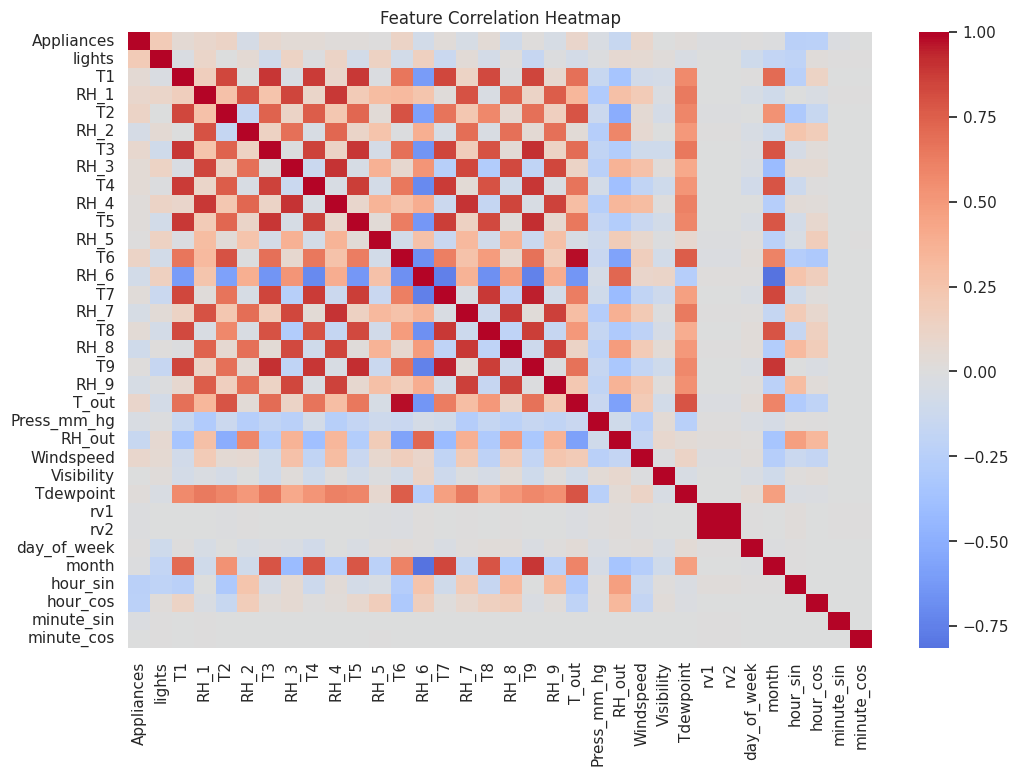

In [8]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.show()

Linear Regression:
 MAE:  51.557
 RMSE: 89.522
 R²:   0.199
----------------------------------------
Random Forest:
 MAE:  30.793
 RMSE: 64.799
 R²:   0.580
----------------------------------------


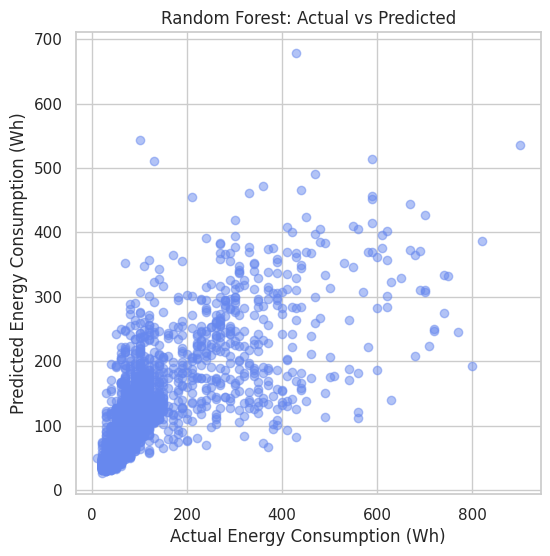

✅ Random Forest model saved to ../models/energy_model_rf.joblib


In [9]:
# ===============================
# 🤖 Model Training & Evaluation
# ===============================

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# 🎯 Target and features
X = df.drop(columns=['Appliances'])
y = df['Appliances']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numeric features (important for linear regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 1️⃣ Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

# 2️⃣ Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# 📊 Evaluation metrics
def evaluate_model(name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{name}:")
    print(f" MAE:  {mae:.3f}")
    print(f" RMSE: {rmse:.3f}")
    print(f" R²:   {r2:.3f}")
    print("-"*40)

evaluate_model("Linear Regression", y_test, y_pred_lr)
evaluate_model("Random Forest", y_test, y_pred_rf)

# Optional: visualize actual vs predicted
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.xlabel("Actual Energy Consumption (Wh)")
plt.ylabel("Predicted Energy Consumption (Wh)")
plt.title("Random Forest: Actual vs Predicted")
plt.show()

# Save best model
joblib.dump(rf, "../models/energy_model_rf.joblib")
print("✅ Random Forest model saved to ../models/energy_model_rf.joblib")


/tmp/ipykernel_14724/789830012.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_importance.head(15), palette='viridis')


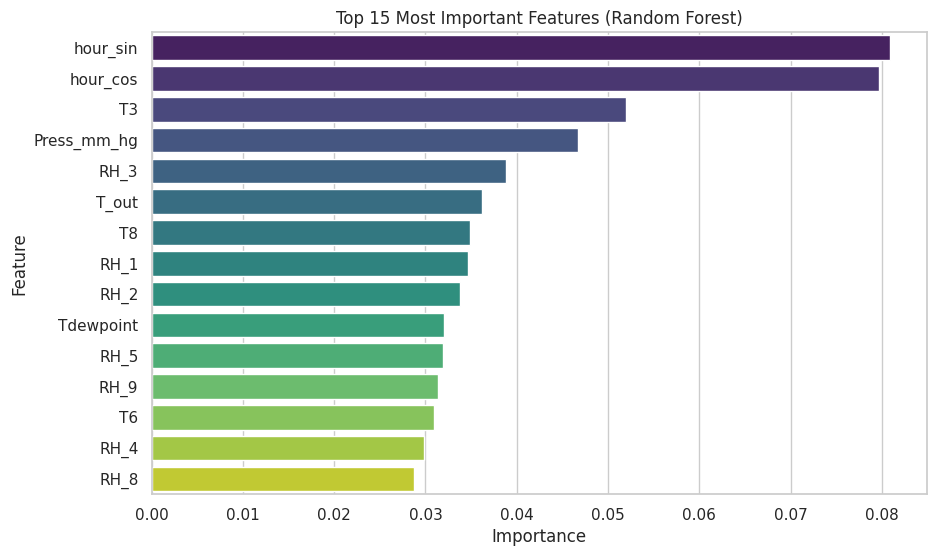

In [10]:
# ===============================
# 🌳 Feature Importance Analysis
# ===============================

importances = rf.feature_importances_
features = X.columns

feat_importance = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_importance = feat_importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_importance.head(15), palette='viridis')
plt.title('Top 15 Most Important Features (Random Forest)')
plt.show()


(15788, 33) (3947, 33)
Fitting 5 folds for each of 40 candidates, totalling 200 fits
✅ Best CV R²: 0.4269
✅ Best Params: {'n_estimators': np.int64(500), 'min_samples_split': np.int64(9), 'min_samples_leaf': np.int64(4), 'max_features': 0.6, 'max_depth': np.int64(22), 'bootstrap': False}

📊 Tuned Random Forest (Hold-out Test):
 MAE:  30.198
 RMSE: 64.624
 R²:   0.583


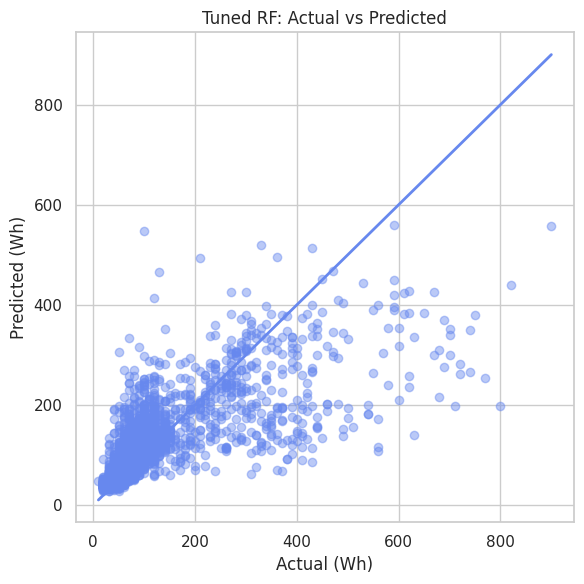

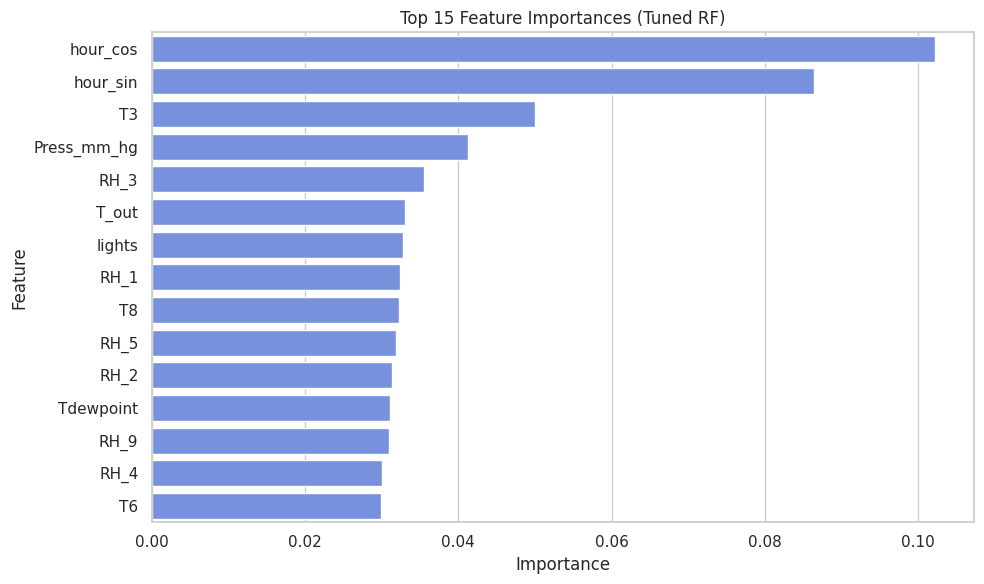

💾 Saved: ../models/energy_model_rf_tuned.joblib


In [12]:
# =========================================
# 🔧 Random Forest Hyperparameter Tuning
#  - TimeSeriesSplit CV
#  - RandomizedSearchCV
# =========================================
from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# If you don't already have X/y and a temporal split, do this:
if 'X_train' not in locals():
    X = df.drop(columns=['Appliances'])
    y = df['Appliances']

    # ⚠️ For time series, sort by original index (already in order for UCI dataset).
    # Create a time-aware hold-out split: last 20% as test
    split_idx = int(len(X) * 0.8)
    X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
    y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

print(X_train.shape, X_test.shape)

# ----- Parameter space (sensible ranges) -----
param_distributions = {
    "n_estimators":      np.arange(150, 600, 50),
    "max_depth":         [None] + list(np.arange(6, 30, 2)),
    "min_samples_split": np.arange(2, 20, 1),
    "min_samples_leaf":  np.arange(1, 15, 1),
    "max_features":      ["sqrt", "log2", None, 0.6, 0.8],
    "bootstrap":         [True, False],
}

# Time-series cross validation (keeps order)
tscv = TimeSeriesSplit(n_splits=5)

base_model = RandomForestRegressor(random_state=42, n_jobs=-1)

search = RandomizedSearchCV(
    estimator=base_model,
    param_distributions=param_distributions,
    n_iter=40,                   # increase to 80–120 for more thorough search
    scoring="r2",                # use R² for regression
    cv=tscv,
    random_state=42,
    n_jobs=-1,
    verbose=1,
)

search.fit(X_train, y_train)

print("✅ Best CV R²:", round(search.best_score_, 4))
print("✅ Best Params:", search.best_params_)

# ----- Retrain best RF on full training data -----
best_rf = search.best_estimator_
best_rf.fit(X_train, y_train)

# Evaluate on hold-out test set
y_pred = best_rf.predict(X_test)
mae  = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(((y_test - y_pred) ** 2).mean())
r2   = r2_score(y_test, y_pred)

print("\n📊 Tuned Random Forest (Hold-out Test):")
print(f" MAE:  {mae:.3f}")
print(f" RMSE: {rmse:.3f}")
print(f" R²:   {r2:.3f}")

# ----- Plot: Actual vs Predicted -----
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.45)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], lw=2)
plt.xlabel("Actual (Wh)")
plt.ylabel("Predicted (Wh)")
plt.title("Tuned RF: Actual vs Predicted")
plt.tight_layout()
plt.show()

# ----- Feature importance (top 15) -----
importances = best_rf.feature_importances_
feat_df = pd.DataFrame({"Feature": X.columns, "Importance": importances}).sort_values("Importance", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=feat_df.head(15), x="Importance", y="Feature")
plt.title("Top 15 Feature Importances (Tuned RF)")
plt.tight_layout()
plt.show()

# ----- Save tuned model -----
joblib.dump(best_rf, "../models/energy_model_rf_tuned.joblib")
print("💾 Saved: ../models/energy_model_rf_tuned.joblib")


In [12]:
df_lag = df.copy()

# Lag features (previous readings)
for lag in [1, 2, 3, 6]:
    df_lag[f'Appliances_lag_{lag}'] = df_lag['Appliances'].shift(lag)

# Rolling averages (smoothed consumption)
df_lag['rolling_mean_6'] = df_lag['Appliances'].rolling(window=6).mean()
df_lag['rolling_std_6'] = df_lag['Appliances'].rolling(window=6).std()

# Drop missing rows caused by lagging
df_lag = df_lag.dropna().reset_index(drop=True)

X = df_lag.drop(columns=['Appliances'])
y = df_lag['Appliances']

# Temporal split (keep order)
split_idx = int(len(X) * 0.8)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]


XGBoost      | MAE:  32.837  RMSE:  56.916  R²:  0.608


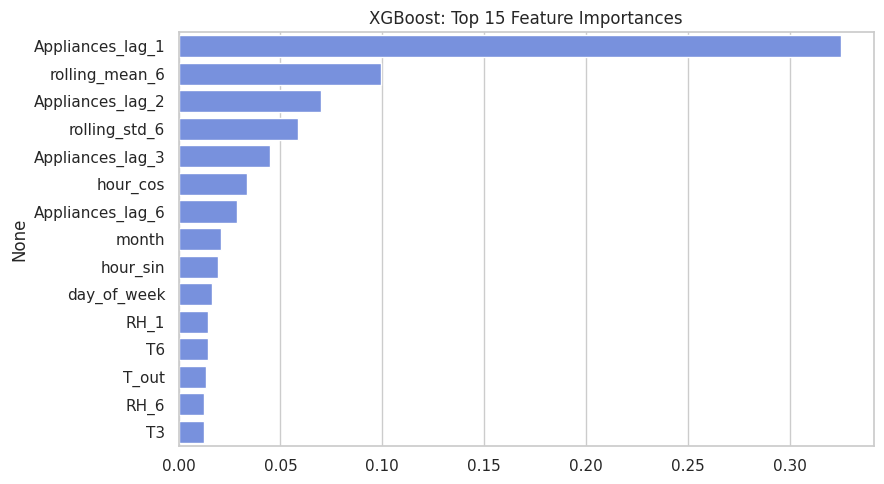

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001544 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7128
[LightGBM] [Info] Number of data points in the train set: 15783, number of used features: 39
[LightGBM] [Info] Start training from score 98.058037
LightGBM     | MAE:  22.885  RMSE:  45.710  R²:  0.747


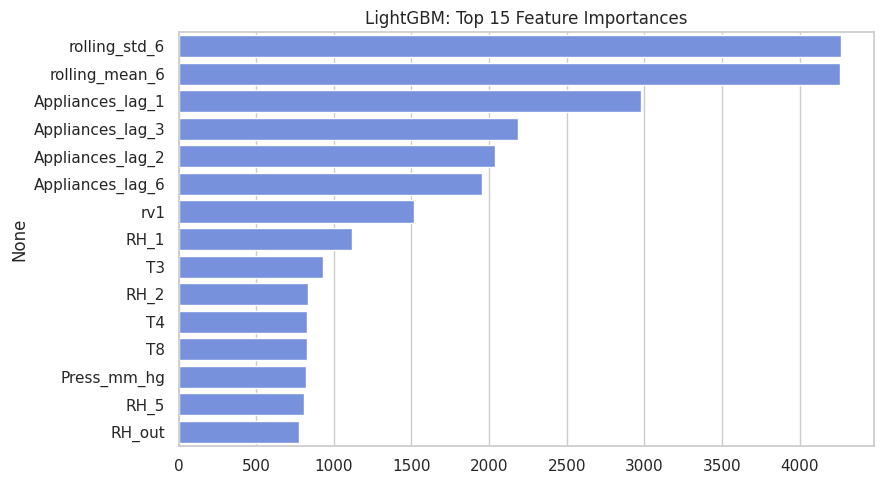

CatBoost     | MAE:  20.783  RMSE:  42.623  R²:  0.780


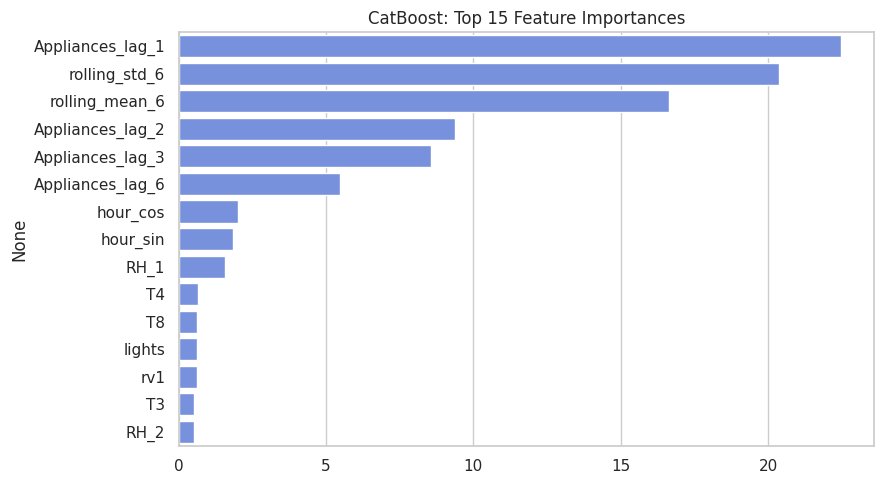

,Model,MAE,RMSE,R2
2,CatBoost,20.783469,42.623348,0.780351
1,LightGBM,22.885172,45.710470,0.747381
0,XGBoost,32.837112,56.915773,0.608348


In [13]:
# ===========================================
# 📦 Gradient Boosting Models: XGB / LGBM / CatBoost
# - Trains what's available
# - Prints MAE, RMSE, R2
# - Shows top feature importances when supported
# ===========================================
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

results = []

def evaluate(name, y_true, y_pred):
    mae  = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(((y_true - y_pred) ** 2).mean())
    r2   = r2_score(y_true, y_pred)
    results.append((name, mae, rmse, r2))
    print(f"{name:12s} | MAE: {mae:7.3f}  RMSE: {rmse:7.3f}  R²: {r2:6.3f}")

# ---------- XGBoost ----------
try:
    from xgboost import XGBRegressor
    xgb = XGBRegressor(
        n_estimators=600,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_lambda=1.0,
        random_state=42,
        n_jobs=-1
    )
    xgb.fit(X_train, y_train)
    y_pred_xgb = xgb.predict(X_test)
    evaluate("XGBoost", y_test, y_pred_xgb)

    # Feature importance (gain-based)
    fi = pd.Series(xgb.feature_importances_, index=X_train.columns).sort_values(ascending=False).head(15)
    plt.figure(figsize=(9,5)); sns.barplot(x=fi.values, y=fi.index)
    plt.title("XGBoost: Top 15 Feature Importances"); plt.tight_layout(); plt.show()
except Exception as e:
    print("XGBoost skipped:", e)

# ---------- LightGBM ----------
try:
    from lightgbm import LGBMRegressor
    lgb = LGBMRegressor(
        n_estimators=1000,
        learning_rate=0.03,
        num_leaves=40,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        n_jobs=-1
    )
    lgb.fit(X_train, y_train)
    y_pred_lgb = lgb.predict(X_test)
    evaluate("LightGBM", y_test, y_pred_lgb)

    fi = pd.Series(lgb.feature_importances_, index=X_train.columns).sort_values(ascending=False).head(15)
    plt.figure(figsize=(9,5)); sns.barplot(x=fi.values, y=fi.index)
    plt.title("LightGBM: Top 15 Feature Importances"); plt.tight_layout(); plt.show()
except Exception as e:
    print("LightGBM skipped:", e)

# ---------- CatBoost ----------
try:
    from catboost import CatBoostRegressor, Pool
    cat = CatBoostRegressor(
        iterations=800,
        learning_rate=0.05,
        depth=8,
        loss_function='RMSE',
        random_seed=42,
        verbose=False
    )
    cat.fit(X_train, y_train)
    y_pred_cat = cat.predict(X_test)
    evaluate("CatBoost", y_test, y_pred_cat)

    fi = pd.Series(cat.get_feature_importance(), index=X_train.columns).sort_values(ascending=False).head(15)
    plt.figure(figsize=(9,5)); sns.barplot(x=fi.values, y=fi.index)
    plt.title("CatBoost: Top 15 Feature Importances"); plt.tight_layout(); plt.show()
except Exception as e:
    print("CatBoost skipped:", e)

# ---------- Summary ----------
summary = pd.DataFrame(results, columns=["Model","MAE","RMSE","R2"]).sort_values("R2", ascending=False)
summary


In [14]:
import joblib
joblib.dump(cat, "../models/energy_model_catboost.joblib")
print("✅ Saved CatBoost model to ../models/energy_model_catboost.joblib")


✅ Saved CatBoost model to ../models/energy_model_catboost.joblib


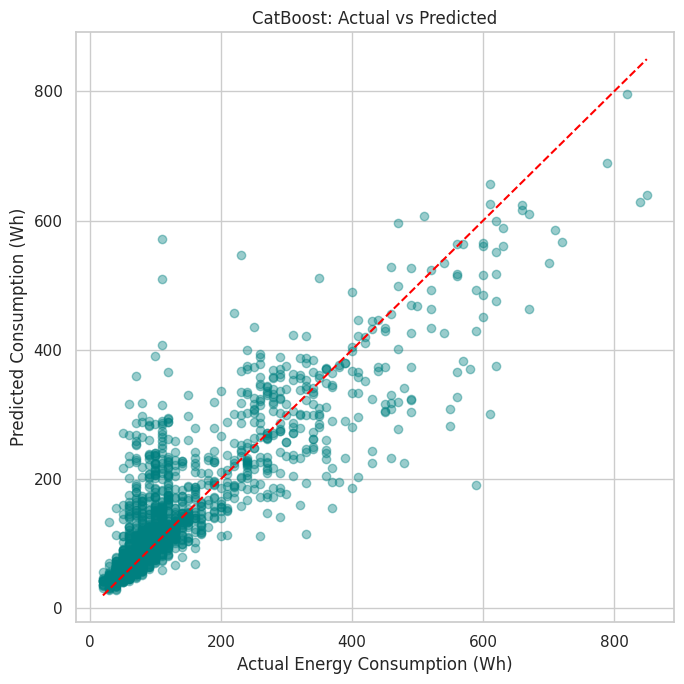

In [15]:
plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred_cat, alpha=0.4, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Energy Consumption (Wh)")
plt.ylabel("Predicted Consumption (Wh)")
plt.title("CatBoost: Actual vs Predicted")
plt.tight_layout()
plt.show()


/tmp/ipykernel_14724/510152738.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp.head(15), palette='viridis')


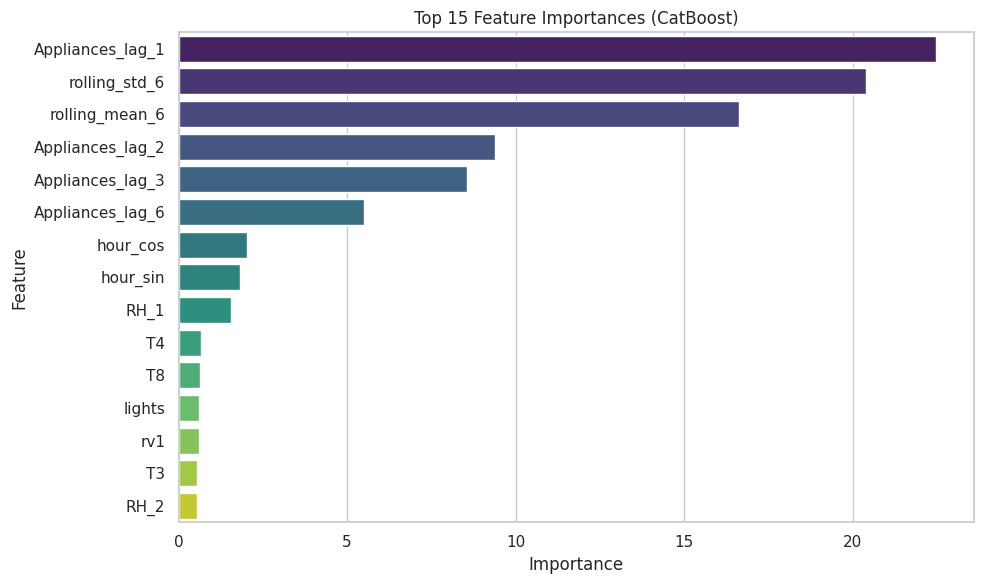

In [16]:
feat_imp = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': cat.get_feature_importance()
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp.head(15), palette='viridis')
plt.title('Top 15 Feature Importances (CatBoost)')
plt.tight_layout()
plt.show()
